# Project 2: Time Series Analysis

In [1]:
# Some important libraries to use in time sereies analysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as statsmodels
import matplotlib.pyplot as plt
import numpy as np
from pandasdmx import Request
import pandas as pd
import os

# Setting fixed figure size
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams.update({'font.size': 18})


#### Importing Lake Huron Data and Plotting it

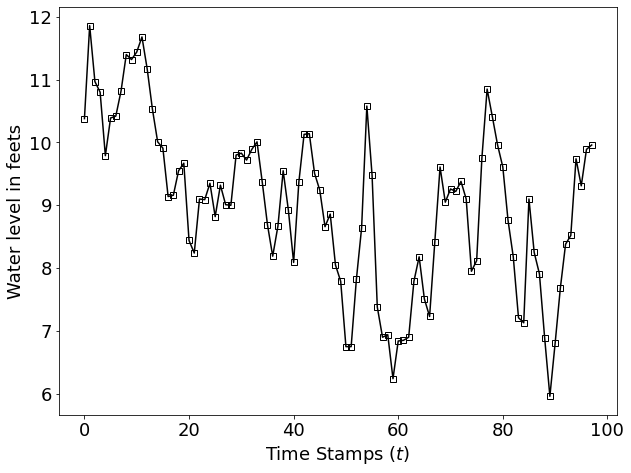

In [10]:
# Obtaining path to data and getting the data
filepath = os.getcwd()
datapath = filepath +"/Data/lakedata.xlsx"
figurepath = filepath+"/Figures"
df = pd.read_excel(datapath)

#plotting data as numpy arrays
data = df.iloc[:,0].to_numpy()
dataTime = np.arange(0,data.shape[0])
plt.figure()
plt.plot(dataTime, data,"k", marker='s', markerfacecolor='none')
plt.xlabel("Time Stamps $(t)$")
plt.ylabel("Water level in feets")

#save figure
plt.savefig(figurepath+"/lakedata.pdf", format="pdf", bbox_inches="tight")
plt.show()


#### Linear regression with Lake Huron Data for $0\leq t \leq 96$

In [11]:
V = np.stack([np.ones(dataTime.shape).T, dataTime.T, (dataTime.T)**2], axis =0).T
VFit = V[0:-1,:]
dataFit = data[0:-1]
a = np.linalg.pinv(VFit.T@VFit)@VFit.T@dataFit.T
a


array([ 1.11927234e+01, -8.68981968e-02,  6.38800778e-04])

#### Plot the polynomial fit

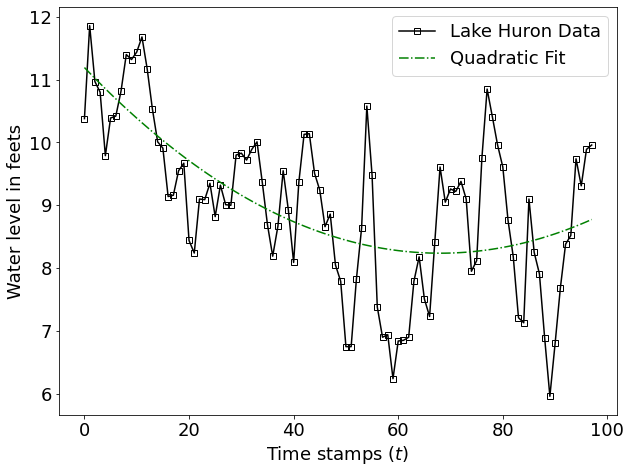

In [14]:
#plotting data as numpy arrays
xPreds = a @ V.T
plt.figure()
plt.plot(dataTime, data,  "k", marker='s', markerfacecolor='none')
plt.plot(dataTime, xPreds, 'g-.')
plt.xlabel("Time stamps $(t)$")
plt.ylabel("Water level in feets")
plt.legend(["Lake Huron Data", "Quadratic Fit"])
#save figure
plt.savefig(figurepath+"/lakefit.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
#predicting water level in 1972
m97 = a@[[1],[97],[97**2]]
print("prediction:",m97[0], " \nactual value:" ,data[-1])

# Error
error =  np.abs(m97 - data[-1])
print("error",error[0])

prediction: 8.774074877926122  
actual value: 9.96
error 1.1859251220738791


#### Residual Plot

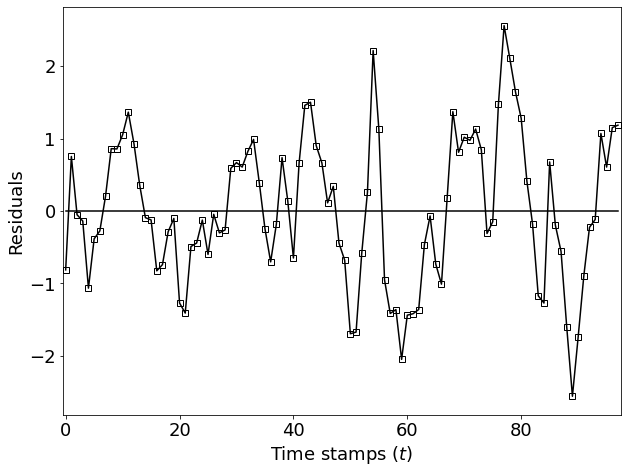

In [17]:
resds = data- xPreds
plt.figure()
plt.plot(dataTime, resds,  "k", marker='s', markerfacecolor='none')
plt.plot(dataTime, np.zeros(dataTime.shape), "k")
plt.xlabel("Time stamps $(t)$")
plt.ylabel("Residuals")
plt.xlim([dataTime[0]-0.5, dataTime[-1]+0.5])
#save figure
plt.savefig(figurepath+"/lakefitres.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Stationary Time Series

## Moving Average Series (MA)

#### We can simulate MA series by sepcifing MA and AR polynomial coefficients.

In [53]:
ar1 = np.array([1,0])
ma1 = np.array([1, 0, 2])
ARMA_1 = ArmaProcess(ar1,ma1).generate_sample(nsample=200)

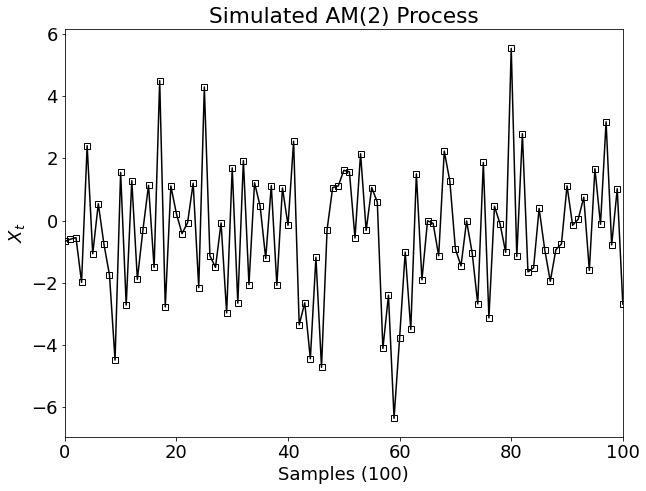

In [54]:
plt.plot( ARMA_1,  "k", marker='s', markerfacecolor='none')
plt.title('Simulated AM(2) Process')
plt.xlim([0,100])
plt.ylabel("$X_t$")
plt.xlabel("Samples (100)")
#save figure
plt.savefig(figurepath+"/MA2.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Using stattools native functions to estimate autocorrelation

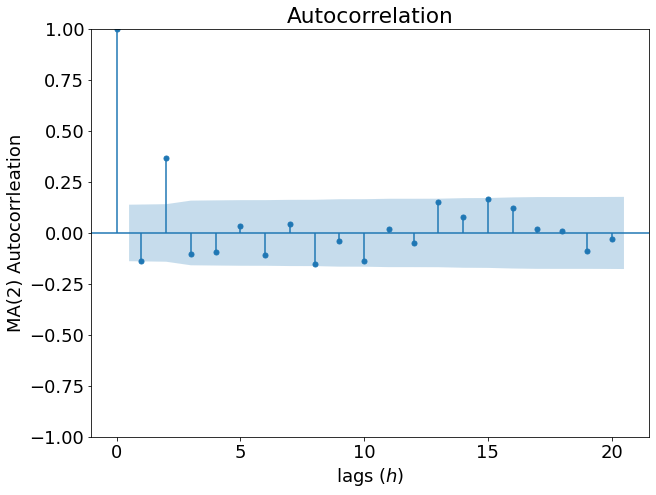

In [55]:
plot_acf(ARMA_1, lags =20)
plt.xlabel("lags $(h)$")
plt.ylabel("MA(2) Autocorrleation")
plt.savefig(figurepath+"/MA2corr.pdf", format="pdf", bbox_inches="tight")

plt.show()

#### We can alo grab the information and plot it in style we prefer.

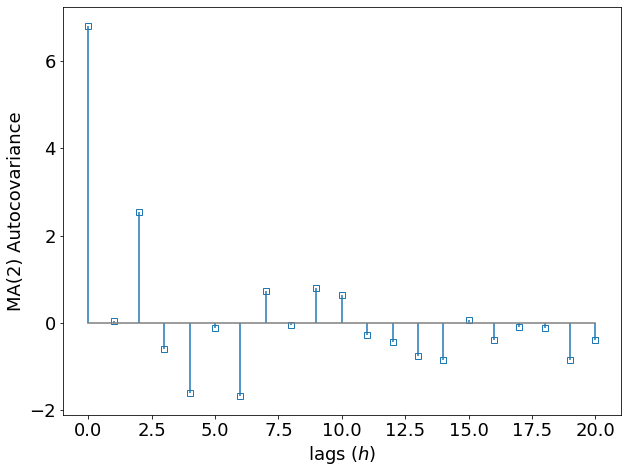

In [51]:
simulated_acv = statsmodels.tsa.stattools.acovf(ARMA_1,nlag =20)
markerline, stemlines, baseline = plt.stem(range(len(simulated_acv)),simulated_acv, markerfmt="s", basefmt="C7")
markerline.set_markerfacecolor('None')
plt.xlabel("lags $(h)$")
plt.ylabel("MA(2) Autocovariance")
plt.savefig(figurepath+"/MA2covCustom.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Statsmodle can also calculate theoretical ACVF

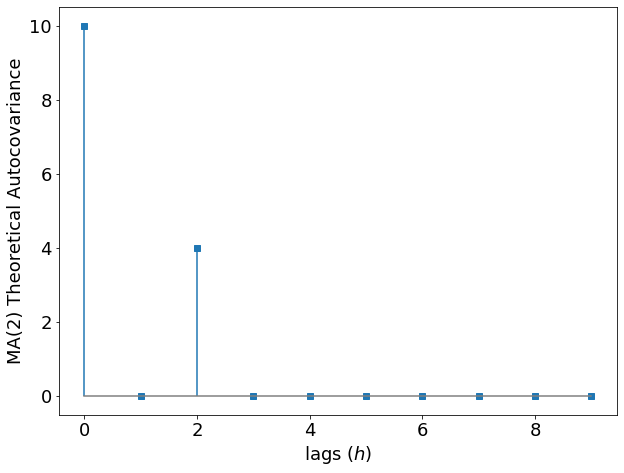

In [52]:
acvf = statsmodels.tsa.arima_process.arma_acovf(ar1, ma1, nobs=10, sigma2=2, dtype=None)
plt.stem(range(len(acvf)),acvf, markerfmt='s',  basefmt="C7")
plt.xlabel("lags $(h)$")
plt.ylabel("MA(2) Theoretical Autocovariance")
plt.savefig(figurepath+"/MA2theoreticalACVF.pdf", format="pdf", bbox_inches="tight")
plt.show()